In [ ]:
! pip install gradio
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 734.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
! pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366494 sha256=736539865e03c75bbefd9e03b98ae55687e391f5c1546ca7830586d0b0272227
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import sys
import pandas as pd
import numpy as np
import surprise
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import dump
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_parquet(r'/content/drive/My Drive/data_ml.parquet')

In [ ]:
data.shape

(5512144, 3)

Obtenemos una muestra del 40% de 'data', llamado 'data1' para trabajar y reservamos el 60% para agregar luego de testeado el modelo

In [ ]:
random.seed(42)

In [ ]:
data1=data.sample(frac=0.4)

In [ ]:
indices_data1 = data1.index

In [ ]:
#datos_resto = data.drop(index=indices_data1)

In [ ]:
data1.head()

,userId,id_numerico,score
3040759,38814,365,5.0
7681047,24682,41488,3.5
3356361,267074,44765,1.0
3209122,36066,46025,5.0
4394920,121456,48353,0.5


In [ ]:
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(data1[['userId', 'id_numerico', 'score']], reader)

Generamos el split del dataset para train y test

In [ ]:
trainset, testset = train_test_split(data1, test_size=0.3)

# Usaremos un modelo de Singular Value Decomposition

In [ ]:
from surprise import SVD
model = SVD()

# Entrenamos el modelo

In [ ]:
model.fit(trainset)

In [ ]:
predictions = model.test(testset)

In [ ]:
predictions[1]

Prediction(uid=61488, iid=48604, r_ui=4.0, est=3.7124387847303333, details={'was_impossible': False})

In [ ]:
model.predict(58949,15221)

Prediction(uid=58949, iid=15221, r_ui=None, est=3.5141342152235966, details={'was_impossible': False})

In [ ]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 0.9955


0.9954952082894724

Veremos con valición cruzada si podemoes mejorar los  hiperparámetros para un mejor rendimiento

In [ ]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data1, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9847  0.9865  0.9863  0.9858  0.0008  
Fit time          21.95   22.13   21.69   21.92   0.18    
Test time         11.21   9.10    9.84    10.05   0.87    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9864  0.9853  0.9855  0.9857  0.0004  
Fit time          22.98   23.06   24.54   23.53   0.72    
Test time         8.09    9.33    9.39    8.94    0.60    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9859  0.9854  0.9870  0.9861  0.0006  
Fit time          25.37   24.69   29.26   26.44   2.01    
Test time         11.47   9.03    9.16    9.89    1.12    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9880  0.9

# Hacemos un gráfico de desempeño según cantidad de factores de SVD

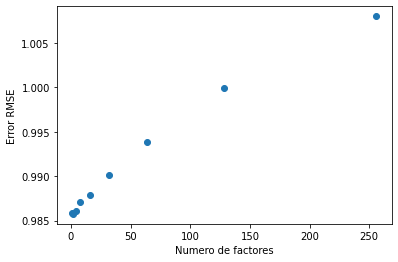

In [ ]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

Generaremos un análisis de grilla para evaluar los mejores hiperparámetros para un modelo de filtrado colaborativo en función de su rendimiento en una métrica de evaluación determinada, en este caso 'rmse'

In [ ]:
M_surpise = 'modelo_entrenado.sav'
dump.dump(M_surpise, algo=model)



---





---

